In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv(r"E:\titanic.csv")

In [5]:
# Step 1: quick view
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.shape

(891, 12)

In [9]:
df.size

10692

In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [50]:
df.info

<bound method DataFrame.info of      Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
5           0       3    male  28.0      0      0   8.4583        Q
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female  28.0      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[718 rows x 8 columns]>

In [12]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [13]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [14]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [52]:
#Useful value_counts
cats = ['Survived','Pclass','Sex','Embarked','Ticket','Cabin']
for c in cats:
    if c in df.columns:
        print(f"\n--- {c} value_counts ---")
        print(df[c].value_counts(dropna=False).head(15))


--- Survived value_counts ---
Survived
0    478
1    240
Name: count, dtype: int64

--- Pclass value_counts ---
Pclass
3    462
2    162
1     94
Name: count, dtype: int64

--- Sex value_counts ---
Sex
male      489
female    229
Name: count, dtype: int64

--- Embarked value_counts ---
Embarked
S    543
C    104
Q     71
Name: count, dtype: int64


In [54]:
df['Age'] = df['Age'].fillna(df['Age'].median())


In [56]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [58]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

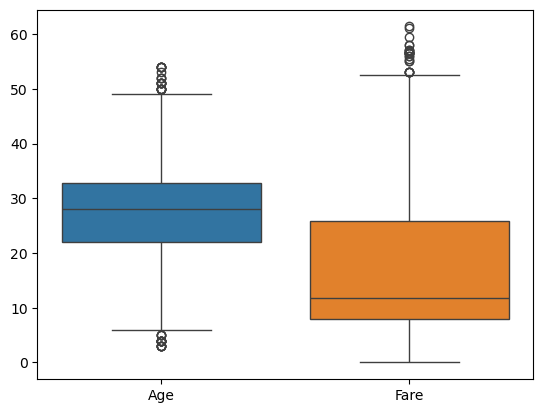

In [60]:
num_cols = ['Age', 'Fare']
for i in num_cols:
    df[i] = df[i].fillna(df[i].median())
sns.boxplot(data=df[num_cols])
plt.show()

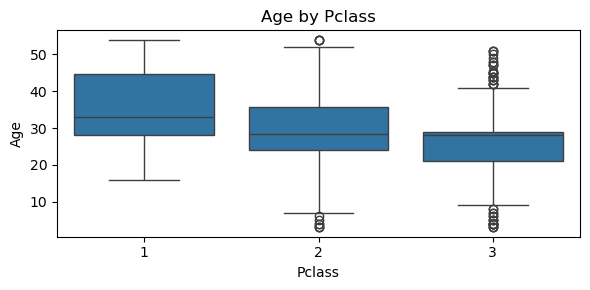

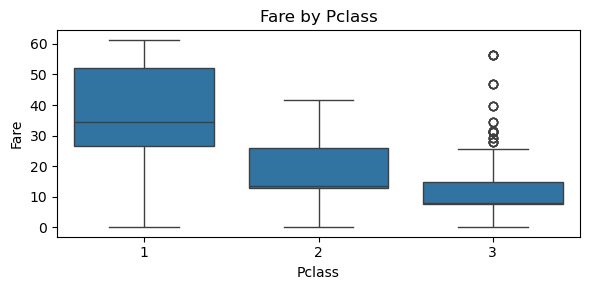

In [62]:
#  boxplots by Pclass
for col in ['Age', 'Fare']:
    if col in df.columns and 'Pclass' in df.columns:
        plt.figure(figsize=(6,3))
        sns.boxplot(x='Pclass', y=col, data=df)
        plt.title(f'{col} by Pclass'); plt.tight_layout(); plt.show()

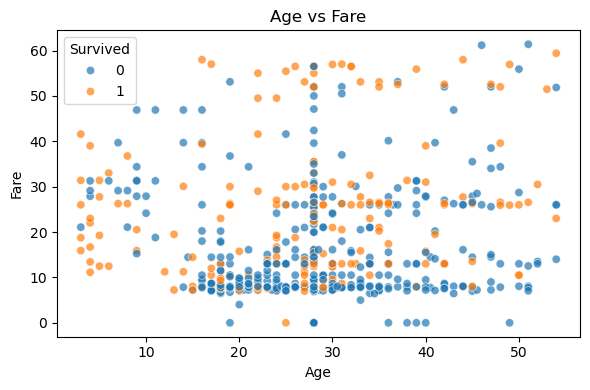

In [64]:
# Age vs Fare scatter with Survived hue
if 'Age' in df.columns and 'Fare' in df.columns:
    plt.figure(figsize=(6,4))
    if 'Survived' in df.columns:
        sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, palette=None, alpha=0.7)
    else:
        plt.scatter(df['Age'], df['Fare'], alpha=0.6)
    plt.title('Age vs Fare'); plt.tight_layout(); plt.show()

In [19]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]


In [20]:
df = remove_outliers_iqr(df, 'Age')
df = remove_outliers_iqr(df, 'Fare')


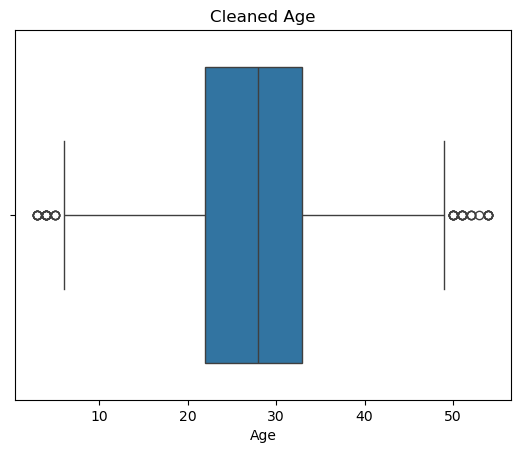

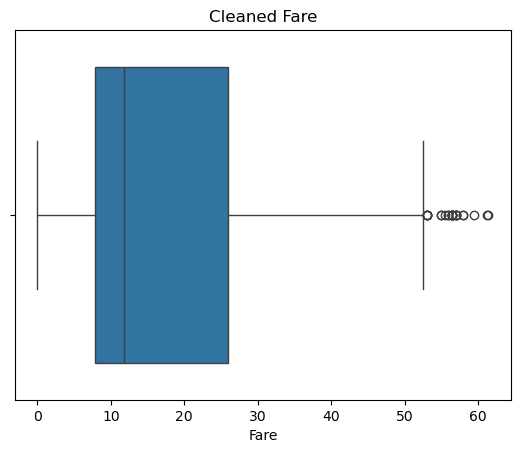

In [21]:
sns.boxplot(x=df['Age'])
plt.title('Cleaned Age')
plt.show()

sns.boxplot(x=df['Fare'])
plt.title('Cleaned Fare')
plt.show()


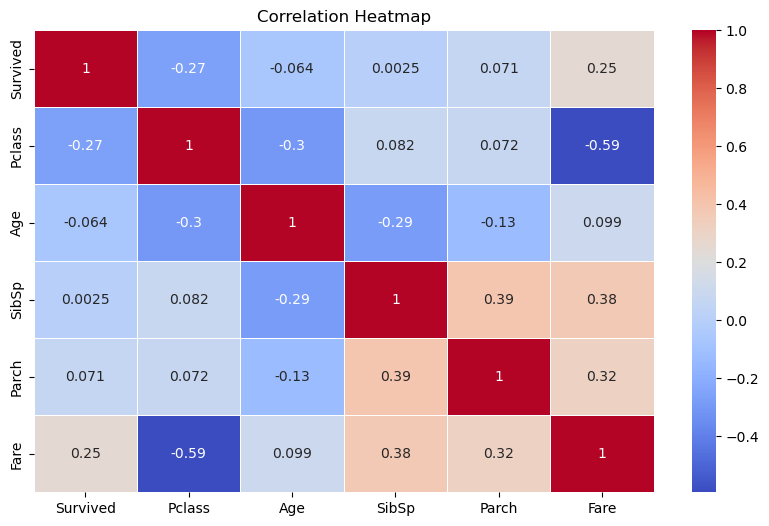

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


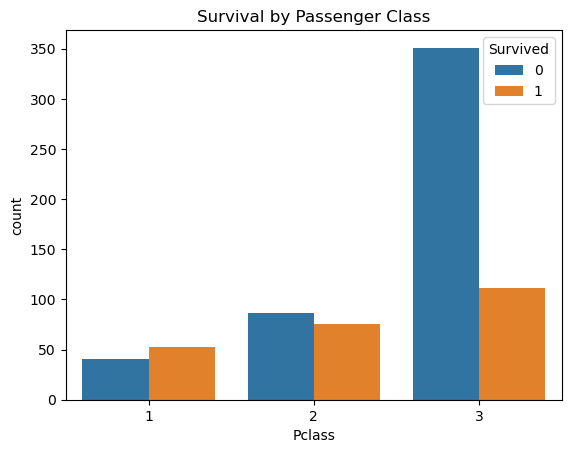

In [23]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()


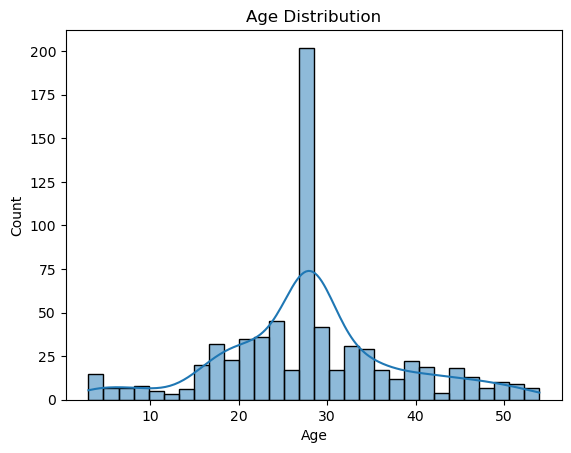

In [24]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()


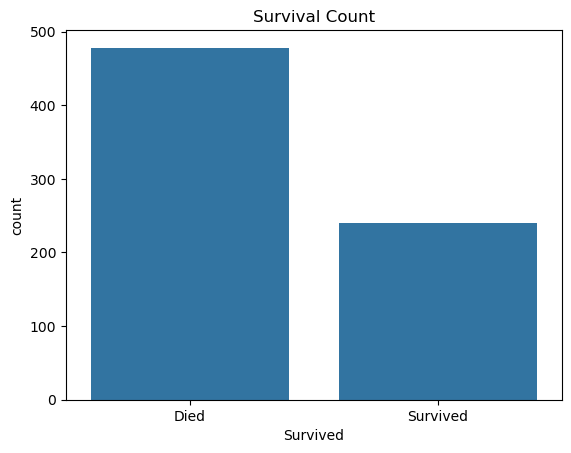

In [25]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.xticks([0, 1], ['Died', 'Survived'])
plt.show()
